In [1]:
from flat_regions import loss_landscape, plot_loss_landscape_heatmap
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def plot_function(loss_function):
    # Generate a range of theta values between -2 and 2
    theta_values = np.linspace(-2, 20, 100000)

    # Calculate the loss for each theta value
    loss_values = loss_function(theta_values)

    # Plot the loss function
    plt.figure(figsize=(10, 6))
    plt.plot(theta_values, loss_values, label='Loss Function 1')
    plt.title('Loss Function 1')
    plt.xlabel('$\\theta$')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [3]:
def loss_function_1(theta):
    return 0.5 * (theta**2) + np.sin(5 * theta)

def loss_function_2(theta):
    return theta**4 - 4 * theta**3 + theta**2 + 3 * theta + 1

def loss_function_3(theta):
    return np.cos(3 * theta) + 0.2 * theta


import numpy as np

import numpy as np

def custom_loss_function_smooth(theta):
    """
    Custom loss function with values between 0 and 1, one significant minimum around 0.2,
    and other local minima not going below 0.7. This version ensures the output range
    through careful design of the function itself and smoothing out sinusoidal components.

    Parameters:
    - theta: A real-valued parameter.

    Returns:
    - Loss value for the given theta, naturally constrained between 0 and 1.
    """
    # Scaled and shifted cosine part for multiple local minima
    cosine_part = 0.15 * (np.cos(0.8 * np.pi * theta)**2 + 1)  # Now peaks around 0.3, base around 0.85
    
    # Gaussian bell curve to create a significant minimum, carefully balanced
    gaussian_part = 0.65 * np.exp(-30 * (theta - 0.5)**2)
    
    # Combination adjusted to maintain values between 0.2 and 1
    loss = 0.85 - cosine_part - gaussian_part
    
    return loss






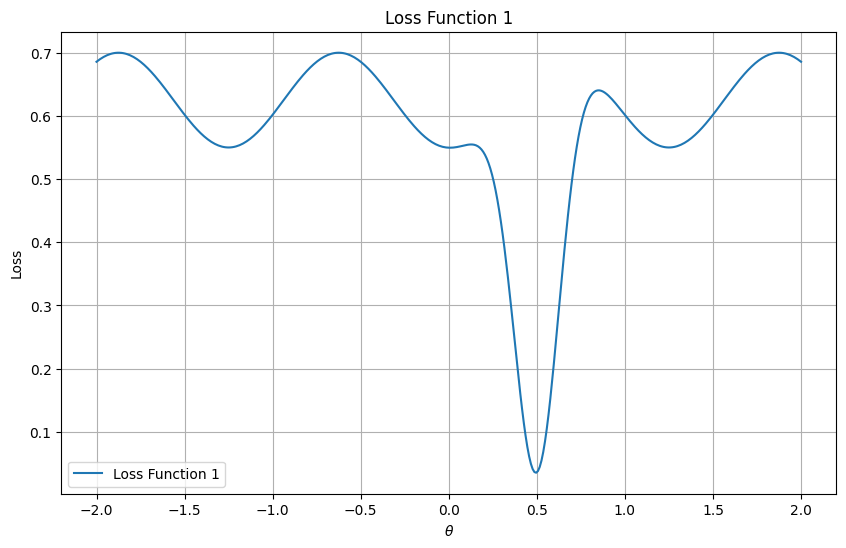

100%|██████████| 90/90 [01:11<00:00,  1.27it/s]


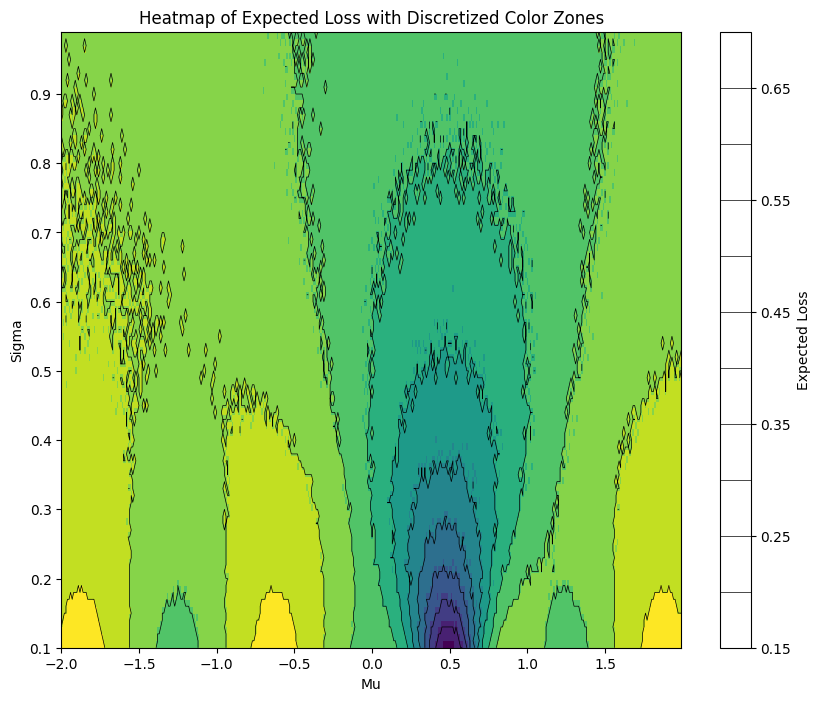

In [4]:
plot_function(custom_loss_function_smooth)
plot_loss_landscape_heatmap((-2, 2, 0.01), (0.1, 1, 0.01), custom_loss_function_smooth, n_samples=1000)